### Introduction

Real estate is the most popular and profitable business across the USA. The most important part of this business is the price prediction of the property.  Therefore, analyzing the factors affect on housing prices is useful for this type of business. In this project, I aimed to build up a machine learning model to predict the housing price of Washington and to exact the characteristics that have the most impact on the housing price of Washington. My project is focused on getting a quick idea about the price of the house and it directly helps homeowners who are trying to sell and people who are seeking to buy houses. 

I used the Pearson's Correlation Coefficient, Box plots, and one-way ANOVA statistical concepts to extract the most impact features on housing prices. After that, I applied Lasso regression to make a model. Finally, I evaluate the model using the coefficient of determinations.

### Algorithm Definition

In the following regression models, the target value can be expressed as a linear combination of the features. Mathematically the predicted values $\hat{y}$ can be written as follows.


$\displaystyle \hat{y}(w,x)=b+w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}$

Here, vector $\displaystyle  w=(w_{1}+w_{2}+...+w_{n})$ is called as the coefficient and $\displaystyle b$ is called as  the intercept.

#### Least-Squares Linear Regression

In Least-Squares Linear Regression, the parameters $w$ and $b$ are estimated by minimizing the residual sum of squares $(RSS)$ between the target value and predicted value from training data.

$\displaystyle RRS(w,b) = \sum_{i=1}^{N} (y_{i} -(w \cdot x_{i} + b))^{2}$






#### Ridge Regression

In Ridge Regression, the parameters $w$ and $b$ are estimated by the same methods as the Least-Squares Linear Regression but adds parameter penalty is called regularization. 

$\displaystyle RRS_{RIDGE}(w,b) = \sum_{i=1}^{N} (y_{i} -(w \cdot x_{i} + b))^{2} + \alpha \sum_{j=1}^{p} \left| w_{j}\right|^2 $

Regularization prevents overfitting the model and reduces its complexity.  Ridge regression model used L2 regularization and regularization term is controlled by $\alpha$ parameter. 


#### Lasso regression

Lasso regression is also a regularized linear regression model that used a regularized L1 penalty for training the model. Lasso stands for Least Absolute Shrinkage and Selection Operator. It minimizes the usual sum of squared errors by minimizing the sum of absolute values of the regression coefficients. 

$\displaystyle RRS_{LASSO}(w,b) = \sum_{i=1}^{N} (y_{i} -(w \cdot x_{i} + b))^{2} + \alpha \sum_{j=1}^{p} \left| w_{j}\right| $

This model works as a model selection by setting parameter wight in w to zero for the least influential variables. Here, alpha controls the amount of L1 regularization. This model also prevents overfitting on the training set.

### Experimental Evaluation

#### Methodology

In this problem, our target variable is the housing price and it is continuous. Therefore, I used the Pearson's Correlation Coefficient to find the correlation between target variable and numerical feature variables and box plots to find the correlation between the target variable and categorical feature variables.

To grantee the correlation between the target variable and categorical variables I used a one-way ANOVA test. Then I used Least-Squares Linear, Ridge, and Lasso models to predict the housing price. After that, the determination of coefficient is used to evaluate the model accuracy.

#### Results

In [1]:
pip install matplotlib==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [238]:
df_row=pd.read_csv(r'D:\Download\Download\DC_Properties_trimmed\DC_Properties_trimmed.csv')
df_row.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [120]:
df_row.shape

(28900, 46)

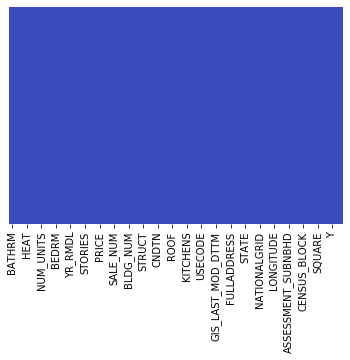

In [121]:
sns.heatmap(df_row.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [122]:
df_row.dtypes

BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS               int64
ROOMS                   int64
BEDRM                   int64
AYB                     int64
YR_RMDL                 int64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                   int64
QUALIFIED              object
SALE_NUM                int64
GBA                     int64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS                int64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
FULLADDRESS            object
CITY                   object
STATE                  object
ZIPCODE   

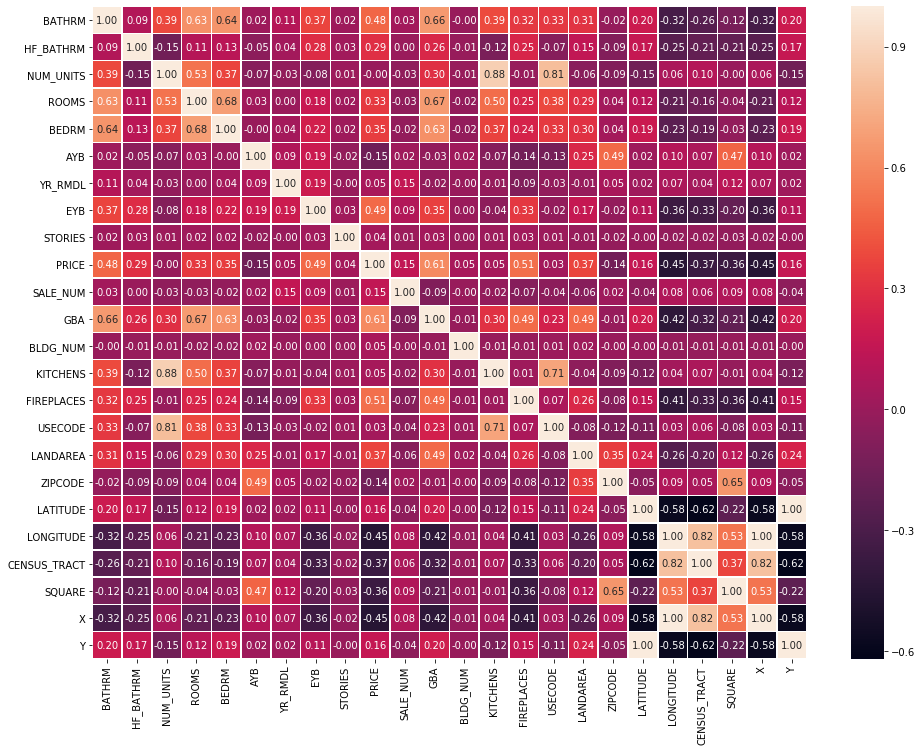

In [123]:
plt.figure(figsize=(16,12))
sns.heatmap(df_row.corr(),annot=True,fmt=".2f",linewidths=.5,xticklabels=True, yticklabels=True)

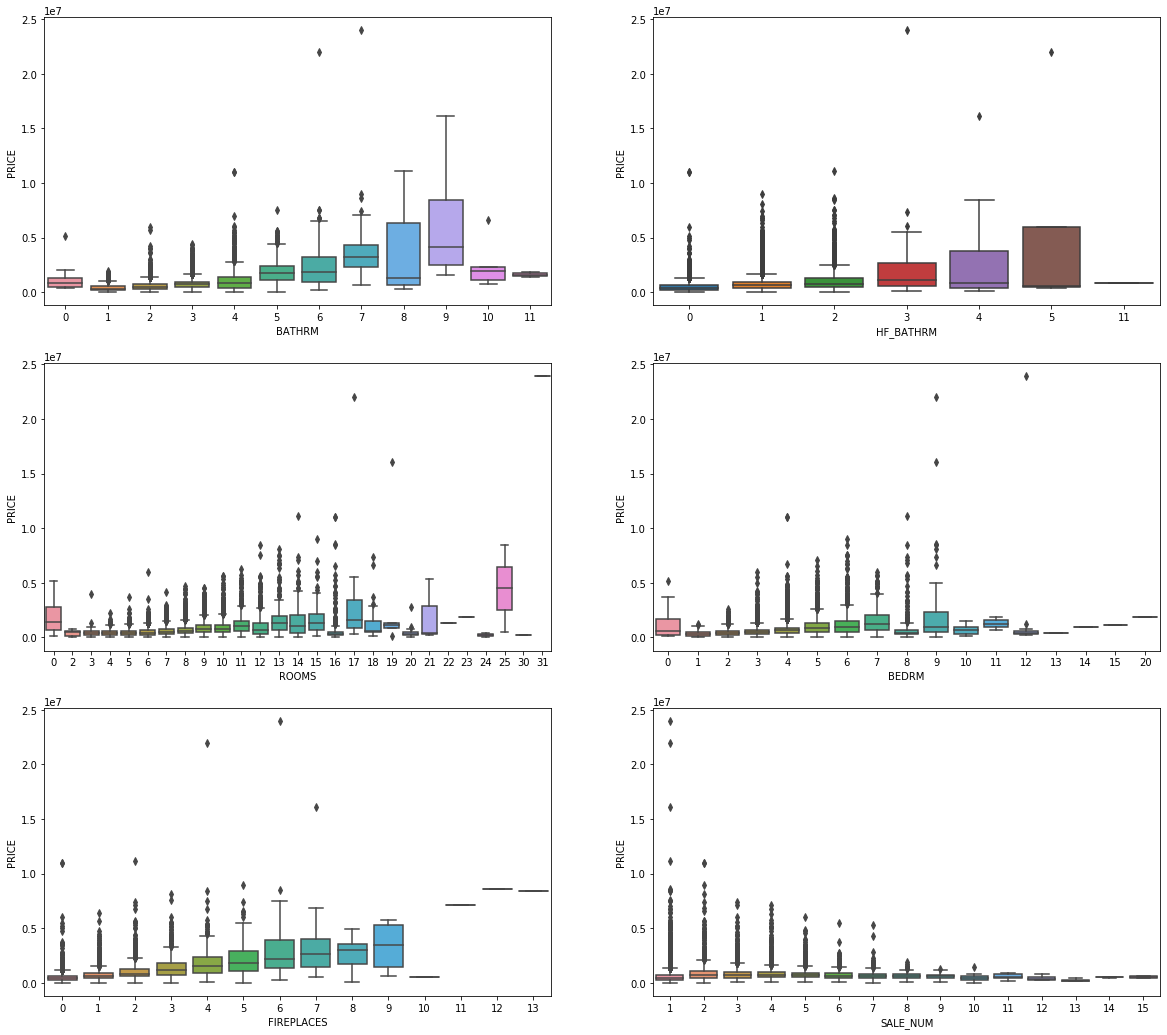

In [124]:
fig,((ax4,ax5),(ax6,ax7),(ax8,ax9))=plt.subplots(3,2,figsize=(20,18))

sns.boxplot(x='BATHRM',y='PRICE',data=df_row,ax=ax4)

sns.boxplot(x='HF_BATHRM',y='PRICE',data=df_row,ax=ax5)

sns.boxplot(x='ROOMS',y='PRICE',data=df_row,ax=ax6)

sns.boxplot(x='BEDRM',y='PRICE',data=df_row,ax=ax7)

sns.boxplot(x='FIREPLACES',y='PRICE',data=df_row,ax=ax8)

sns.boxplot(x='SALE_NUM',y='PRICE',data=df_row,ax=ax9)


In [125]:
df_row.corr()['PRICE']

BATHRM          0.478453
HF_BATHRM       0.294055
NUM_UNITS      -0.000932
ROOMS           0.333632
BEDRM           0.347708
AYB            -0.154585
YR_RMDL         0.053331
EYB             0.490661
STORIES         0.043205
PRICE           1.000000
SALE_NUM        0.147683
GBA             0.607680
BLDG_NUM        0.053984
KITCHENS        0.046747
FIREPLACES      0.510100
USECODE         0.032633
LANDAREA        0.367954
ZIPCODE        -0.138481
LATITUDE        0.163768
LONGITUDE      -0.448443
CENSUS_TRACT   -0.372004
SQUARE         -0.362841
X              -0.448424
Y               0.163693
Name: PRICE, dtype: float64

In [126]:
df_row.PRICE.describe()

count    2.890000e+04
mean     6.549323e+05
std      6.048247e+05
min      1.000000e+00
25%      3.100000e+05
50%      5.475000e+05
75%      8.100000e+05
max      2.396029e+07
Name: PRICE, dtype: float64

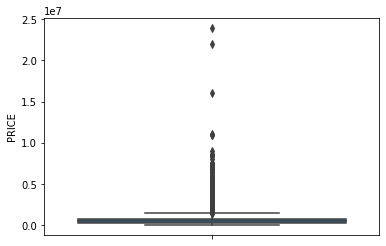

In [127]:
sns.boxplot(y=df_row['PRICE'])

In [128]:
#Q1=df_row.PRICE.quantile(0.25)
#Q3=df_row.PRICE.quantile(0.75)
#IQR=Q3-Q1

#Lower_limit=Q1-1.5*IQR
#Upper_limit=Q3+1.5*IQR

In [239]:
df=df_row[(df_row.PRICE<=0.5*10**7)& 
          (df_row.FIREPLACES<10) & (df_row.ROOMS<16) & (df_row.BATHRM<8) 
          &(df_row.HF_BATHRM<4)&(df_row.BEDRM<8)]



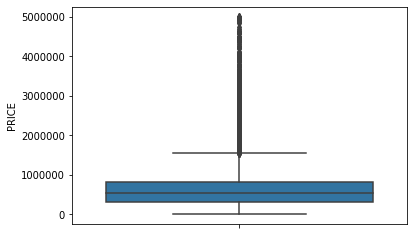

In [180]:
sns.boxplot(y=df['PRICE'])

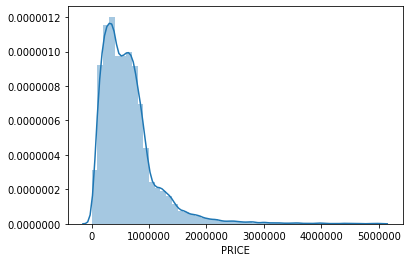

In [167]:
sns.distplot(df['PRICE'])

In [240]:
df=df.drop(['X','Y','GIS_LAST_MOD_DTTM','STORIES','CITY','STATE'],axis=1)

In [209]:
df.shape

(28236, 40)

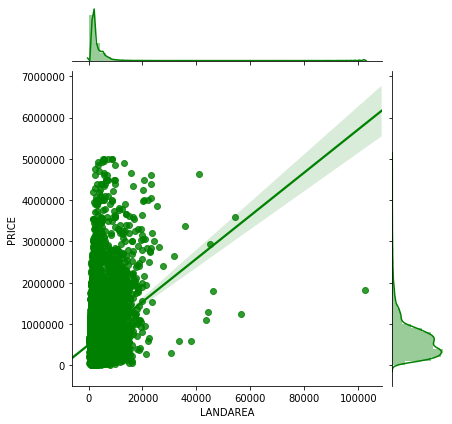

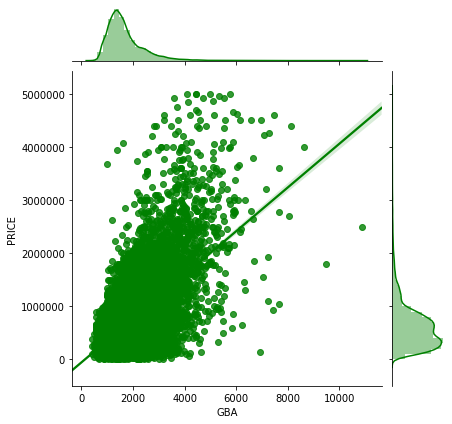

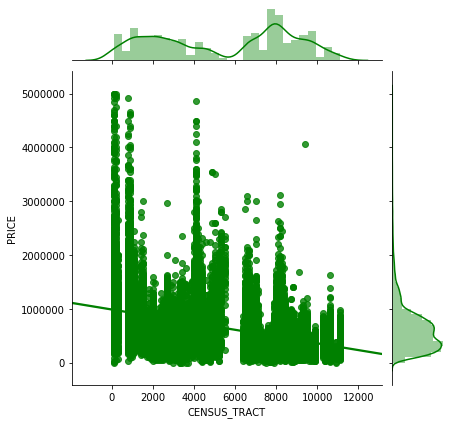

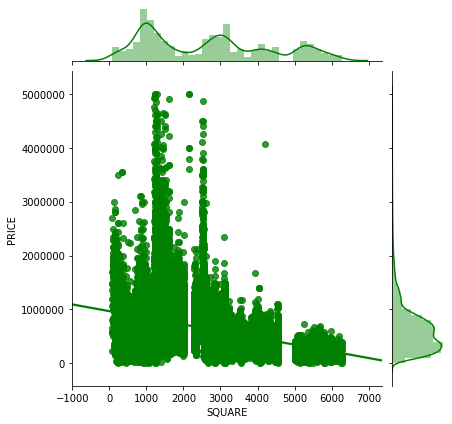

In [134]:
sns.jointplot(x='LANDAREA',y='PRICE',data=df,kind='reg',color='g')

sns.jointplot(x='GBA',y='PRICE',data=df,kind='reg',color='g')  

sns.jointplot(x='CENSUS_TRACT',y='PRICE',data=df,kind='reg',color='g')  

sns.jointplot(x='SQUARE',y='PRICE',data=df,kind='reg',color='g')


In [241]:
categorical_features=df.select_dtypes(include='object')
categorical_features.columns

Index(['HEAT', 'AC', 'SALEDATE', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'SOURCE', 'FULLADDRESS',
       'NATIONALGRID', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK',
       'WARD', 'QUADRANT'],
      dtype='object')

In [242]:
df=df.replace('0','N')

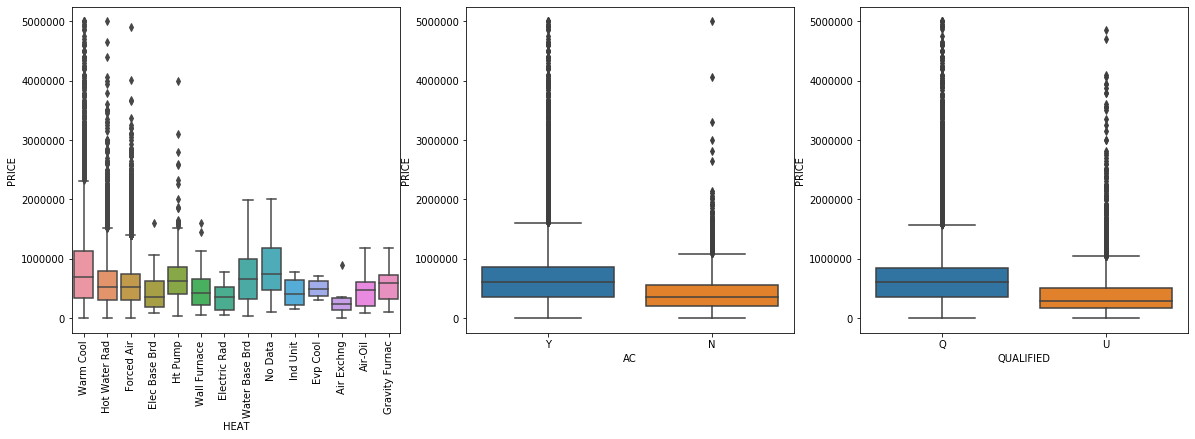

In [137]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='HEAT',y='PRICE',data=df,ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

sns.boxplot(x='AC',y='PRICE',data=df,ax=ax2)

sns.boxplot(x='QUALIFIED',y='PRICE',data=df,ax=ax3)



[Text(0, 0, 'Very Good'),
 Text(0, 0, 'Above Average'),
 Text(0, 0, 'Good Quality'),
 Text(0, 0, 'Excellent'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Superior'),
 Text(0, 0, 'Fair Quality'),
 Text(0, 0, 'Exceptional-A'),
 Text(0, 0, 'Exceptional-B'),
 Text(0, 0, 'Exceptional-C'),
 Text(0, 0, 'Exceptional-D')]

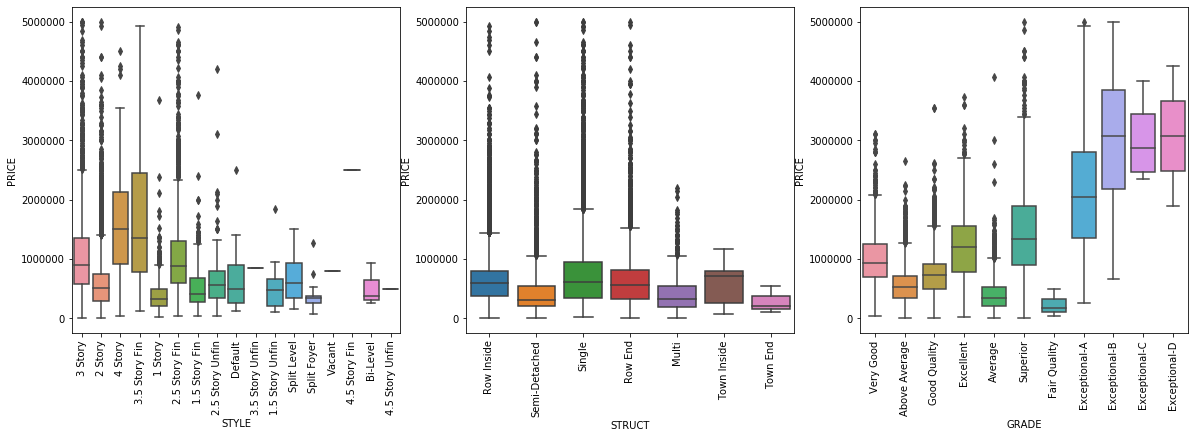

In [138]:
fig,(ax4,ax5,ax6)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='STYLE',y='PRICE',data=df,ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)

sns.boxplot(x='STRUCT',y='PRICE',data=df,ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)

sns.boxplot(x='GRADE',y='PRICE',data=df,ax=ax6)
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)



[Text(0, 0, 'Hardwood'),
 Text(0, 0, 'Wood Floor'),
 Text(0, 0, 'Carpet'),
 Text(0, 0, 'Hardwood/Carp'),
 Text(0, 0, 'Ceramic Tile'),
 Text(0, 0, 'Lt Concrete'),
 Text(0, 0, 'Default'),
 Text(0, 0, 'Parquet'),
 Text(0, 0, 'Resiliant'),
 Text(0, 0, 'Vinyl Sheet'),
 Text(0, 0, 'Terrazo'),
 Text(0, 0, 'Vinyl Comp')]

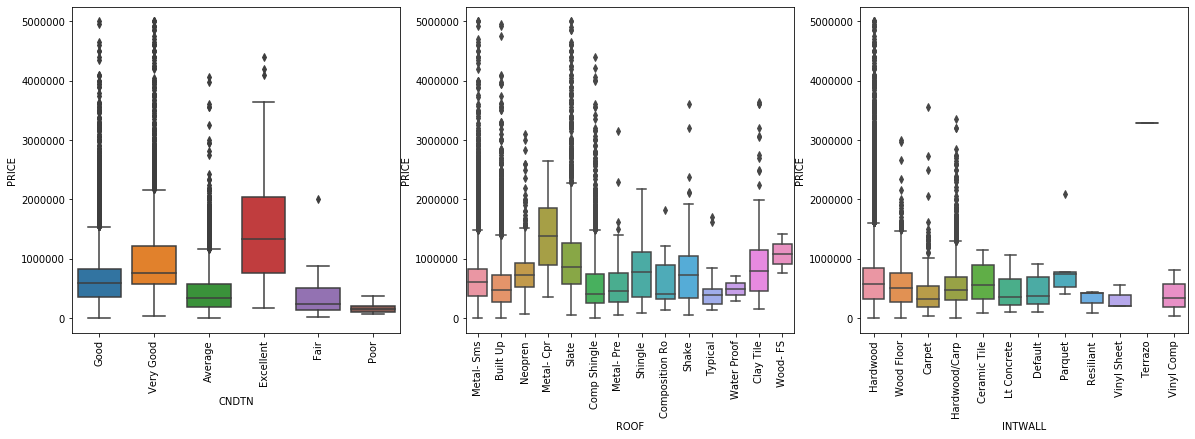

In [139]:
fig,(ax7,ax8,ax9)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='CNDTN',y='PRICE',data=df,ax=ax7)
ax7.set_xticklabels(ax7.get_xticklabels(),rotation=90)

sns.boxplot(x='ROOF',y='PRICE',data=df,ax=ax8)
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=90)

sns.boxplot(x='INTWALL',y='PRICE',data=df,ax=ax9)
ax9.set_xticklabels(ax9.get_xticklabels(),rotation=90)


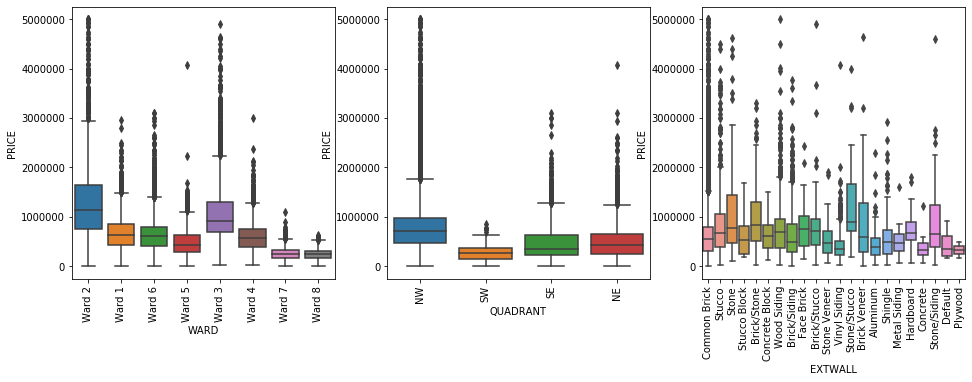

In [140]:
fig,(ax10,ax11,ax12)=plt.subplots(1,3,figsize=(16,5))


sns.boxplot(x='WARD',y='PRICE',data=df,ax=ax10)
ax10.set_xticklabels(ax10.get_xticklabels(),rotation=90)

sns.boxplot(x='QUADRANT',y='PRICE',data=df,ax=ax11)
ax11.set_xticklabels(ax11.get_xticklabels(),rotation=90)

sns.boxplot(x='EXTWALL',y='PRICE',data=df,ax=ax12)
ax12.set_xticklabels(ax12.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.6)

In [141]:
#from scipy.stats import f_oneway

#for i in categorical_features.columns:
    
       # if i in ['GIS_LAST_MOD_DTTM','SOURCE','CITY','STATE']:
           # continue
        #dfanaova=df[[i,'PRICE']]
        #group_anova=df_anaova.groupby([i])
        #anova_test=f_oneway(group_anova.get_group(df[i].value_counts().index[0])['PRICE'],
                            #group_anova.get_group(df[i].value_counts().index[1])['PRICE'])
        #print('Name: {},F-statistic:{},P-value:{}'.format(i,anova_test[0],anova_test[1]))
        

In [243]:
df['SALEDATE']=pd.to_datetime(df['SALEDATE'])

In [244]:
df['SALEYEAR']=df['SALEDATE'].dt.year

In [245]:
df['SALEYEAR']=df['SALEYEAR'].astype(np.int64)

In [246]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,SALEYEAR
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,38.914680,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,NW,2003
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,38.914684,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,NW,2016
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,38.914683,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,NW,2006
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,38.915408,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,NW,2011
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,38.915017,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,NW,2018


In [247]:
df_final=df.drop(['SALEDATE','QUALIFIED','SOURCE','FULLADDRESS','NATIONALGRID'],axis=1)

In [248]:
X=df_final.drop(['PRICE'],axis=1)

y=df_final['PRICE']

In [249]:
X.shape

(28236, 35)

In [250]:
X.dtypes

BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS               int64
ROOMS                   int64
BEDRM                   int64
AYB                     int64
YR_RMDL                 int64
EYB                     int64
SALE_NUM                int64
GBA                     int64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS                int64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
ZIPCODE                 int64
LATITUDE              float64
LONGITUDE             float64
ASSESSMENT_NBHD        object
ASSESSMENT_SUBNBHD     object
CENSUS_TRACT            int64
CENSUS_BLOCK           object
WARD                   object
SQUARE                  int64
QUADRANT  

In [251]:
y.shape

(28236,)

In [252]:
X=pd.get_dummies(df_final,columns=['HEAT', 'AC', 'STYLE',
                             'STRUCT', 'GRADE', 'CNDTN',
                             'EXTWALL','INTWALL','ROOF',
                             'WARD','ASSESSMENT_NBHD', 
                             'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK','QUADRANT'],drop_first=True)

In [253]:
X.shape

(28236, 3268)

In [254]:
X.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,SALE_NUM,...,CENSUS_BLOCK_011100 3011,CENSUS_BLOCK_011100 3023,CENSUS_BLOCK_011100 3037,CENSUS_BLOCK_011100 3038,CENSUS_BLOCK_011100 3039,CENSUS_BLOCK_011100 3040,CENSUS_BLOCK_011100 3041,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,4,0,2,8,4,1910,1988,1972,1095000,1,...,0,0,0,0,0,0,0,1,0,0
1,3,1,2,9,5,1910,2009,1984,2100000,3,...,0,0,0,0,0,0,0,1,0,0
2,3,1,2,8,5,1900,2003,1984,1602000,1,...,0,0,0,0,0,0,0,1,0,0
3,3,1,2,8,4,1906,2011,1972,1050000,1,...,0,0,0,0,0,0,0,1,0,0
4,3,1,2,7,3,1908,2008,1967,1430000,4,...,0,0,0,0,0,0,0,1,0,0


In [255]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [256]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=0)

In [257]:
X_train.shape

(16941, 3268)

In [258]:
lr=LinearRegression()

lr.fit(X_train,y_train)

y_predict=lr.predict(X_test)

print('Train score: {},Test score: {}, R2 score: {}'.format(lr.score(X_train,y_train),
                                                            lr.score(X_test,y_test),
                                                            r2_score(y_test,y_predict)))


Train score: 1.0,Test score: 1.0, R2 score: 1.0


In [259]:
mc=MinMaxScaler()

X_train_scaled=mc.fit_transform(X_train)

X_test_scaled=mc.transform(X_test)

alapha_value=range(1,41)

for i in alapha_value:

    ls=Lasso(alpha=i,max_iter=10000)

    ls.fit(X_train_scaled,y_train)

    y_predict=ls.predict(X_test_scaled)

    print('Train score: {},Test score: {}, R2 score: {}'.format(ls.score(X_train_scaled,y_train),
                                                                ls.score(X_test_scaled,y_test),
                                                                r2_score(y_test,y_predict)))



Train score: 0.9999995257094223,Test score: 0.9999995032161683, R2 score: 0.9999995032161684
Train score: 0.9999996852890921,Test score: 0.9999996788418036, R2 score: 0.9999996788418036
Train score: 0.9999997952588999,Test score: 0.9999997941484883, R2 score: 0.9999997941484883
Train score: 0.9999997630383366,Test score: 0.9999997600696036, R2 score: 0.9999997600696036
Train score: 0.9999996993170215,Test score: 0.9999996959840282, R2 score: 0.9999996959840283
Train score: 0.9999996586191292,Test score: 0.9999996553807887, R2 score: 0.9999996553807887
Train score: 0.9999998683827446,Test score: 0.9999998656221533, R2 score: 0.9999998656221532
Train score: 0.9999998255551164,Test score: 0.9999998218017921, R2 score: 0.9999998218017921
Train score: 0.9999997992524532,Test score: 0.9999997951750548, R2 score: 0.9999997951750548
Train score: 0.9999997703842619,Test score: 0.9999997659389245, R2 score: 0.9999997659389244
Train score: 0.9999997965615135,Test score: 0.9999997929666932, R2 sco

In [260]:
alapha_value=range(1,21)

for i in alapha_value:
    
        rd=Ridge(alpha=i)

        rd.fit(X_train_scaled,y_train)

        y_predict=rd.predict(X_test_scaled)

        print('Train score: {},Test score: {}, R2 score: {}'.format(rd.score(X_train_scaled,y_train),
                                                                rd.score(X_test_scaled,y_test),
                                                                r2_score(y_test,y_predict)))


Train score: 0.9997910026637205,Test score: 0.9996868837643054, R2 score: 0.9996868837643053
Train score: 0.999273309188443,Test score: 0.9989695239177752, R2 score: 0.9989695239177752
Train score: 0.9985363743872459,Test score: 0.9979994323510896, R2 score: 0.9979994323510897
Train score: 0.9976330234744568,Test score: 0.9968521318016522, R2 score: 0.9968521318016522
Train score: 0.9966001337698657,Test score: 0.9955751698516978, R2 score: 0.9955751698516977
Train score: 0.9954652308663152,Test score: 0.9942015112221785, R2 score: 0.9942015112221785
Train score: 0.994249615728302,Test score: 0.9927552750037787, R2 score: 0.9927552750037786
Train score: 0.9929701493870506,Test score: 0.9912547192069783, R2 score: 0.9912547192069783
Train score: 0.9916403882611171,Test score: 0.9897139894704865, R2 score: 0.9897139894704866
Train score: 0.9902713577322694,Test score: 0.9881442292612453, R2 score: 0.9881442292612453
Train score: 0.9888721041353006,Test score: 0.9865543260537307, R2 score

In [262]:
from sklearn.ensemble import RandomForestRegressor

In [263]:
for i in range(1,10):
    rf=RandomForestRegressor(n_estimators=20,max_features=i).fit(X_train,y_train)
    y_predict=rf.predict(X_test)
    print('Train score: {}.Test score: {}, R2 score: {}'.format(rf.score(X_train,y_train),
                                                                rf.score(X_test,y_test),
                                                                r2_score(y_test,y_predict)))

Train score: 0.9687085612905546.Test score: 0.8062127694151546, R2 score: 0.8062127694151546
Train score: 0.9657219133619181.Test score: 0.7893296095544273, R2 score: 0.7893296095544273
Train score: 0.967265984459253.Test score: 0.7994063782079075, R2 score: 0.7994063782079075
Train score: 0.9654040795833437.Test score: 0.7844658282736784, R2 score: 0.7844658282736784
Train score: 0.967072839719857.Test score: 0.7976555964822589, R2 score: 0.7976555964822589
Train score: 0.9669917614524152.Test score: 0.7987086265122222, R2 score: 0.7987086265122222
Train score: 0.9660262801431008.Test score: 0.7881112926223529, R2 score: 0.7881112926223529
Train score: 0.9629249123664764.Test score: 0.7729812339503632, R2 score: 0.7729812339503632
Train score: 0.9678781495775376.Test score: 0.8059502285137701, R2 score: 0.8059502285137701
